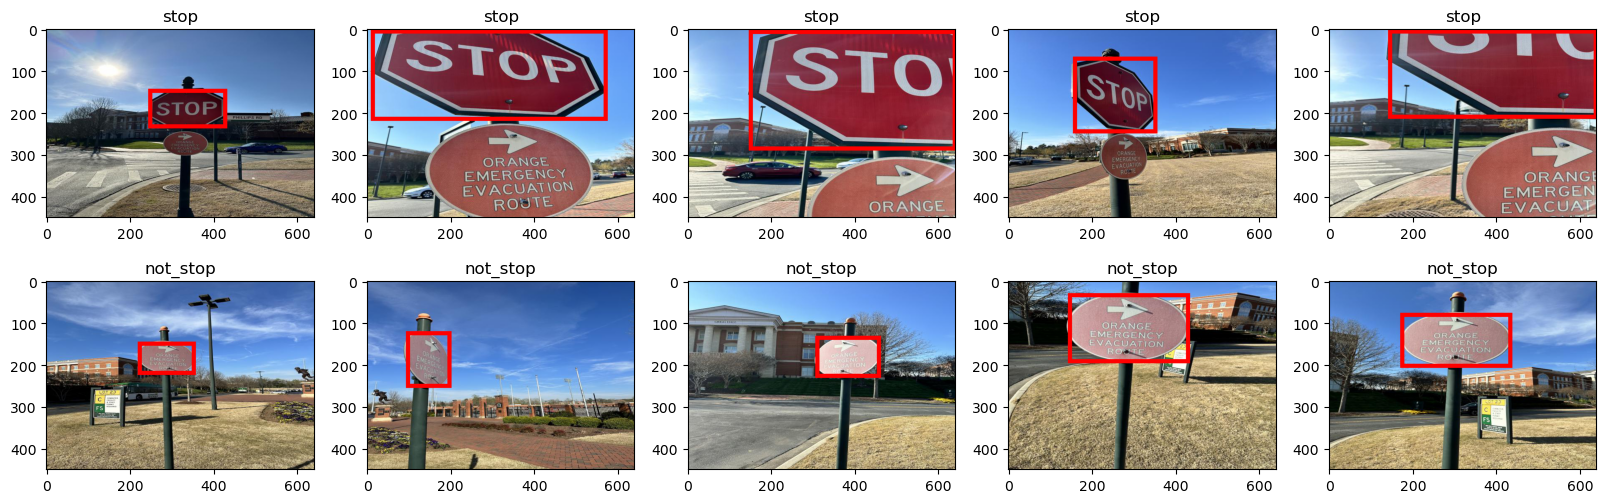

In [12]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from PIL import Image
from PIL import Image, ImageDraw
class CustomDataset:
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.stop_dir = os.path.join(data_dir, 'stop')
        self.not_stop_dir = os.path.join(data_dir, 'not_stop')
        self.annotations_dir = os.path.join(data_dir, 'annotations')
        
        self.stop_images = [os.path.join(self.stop_dir, f) for f in os.listdir(self.stop_dir)]
        self.not_stop_images = [os.path.join(self.not_stop_dir, f) for f in os.listdir(self.not_stop_dir)]
        
    def __len__(self):
        return len(self.stop_images) + len(self.not_stop_images)
        
    def __getitem__(self, idx):
        if idx < len(self.stop_images):
            img_path = self.stop_images[idx]
            label = 'stop'
        else:
            img_path = self.not_stop_images[idx - len(self.stop_images)]
            label = 'not_stop'
            
        img = Image.open(img_path)
        
        # Load the annotations
        annotations_path = os.path.join(self.annotations_dir, os.path.basename(img_path).replace('.png', '.xml'))
        tree = ET.parse(annotations_path)
        root = tree.getroot()
        
        bboxes = []
        
        for obj in root.findall('object'):
            if obj.find('name').text == label:
                bbox = obj.find('bndbox')
                bboxes.append([int(bbox.find(x).text) for x in ['xmin', 'ymin', 'xmax', 'ymax']])
                
        return img, label, bboxes


# Load the images
dataset = CustomDataset('./customdataset')

# Display the first 5 images from each directory
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 6))

for i in range(5):
    # Stop sign images
    img, label, bboxes = dataset[i]
    for bbox in bboxes:
        draw = ImageDraw.Draw(img)
        draw.rectangle(bbox, outline='red', width=10)
    axes[0, i].imshow(img)
    axes[0, i].set_title(label)

    # Not stop sign images
    img, label, bboxes = dataset[i + len(dataset.stop_images)]
    for bbox in bboxes:
        draw = ImageDraw.Draw(img)
        draw.rectangle(bbox, outline='red', width=10)
    axes[1, i].imshow(img)
    axes[1, i].set_title(label)

plt.show()
